# Práctica 2

Álvaro Huertas García

Sara Dorado Alfaro

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

## Estudiar las propiedades de un grafo aleatorio

Usando la función gnp_random_graph(n,p) de NetworkX Implementad una rutina
Python L_C_Aleatorio que devuelva valor promedio de los coeficientes C (índice de
clusterización promedio) y L (camino característico) de un conjunto de n_graph grafos
aleatorios de n nodos y probabilidad p. 

In [2]:
def L_C_Aleatorio(n_graph,n,p):
    mu_C = 0
    mu_L = 0
    for i in range(n_graph):
        G = nx.gnp_random_graph(n, p)
        C = nx.average_clustering(G)
        if nx.is_connected(G):
            L = nx.average_shortest_path_length(G)
        else:
            L = n-1
        mu_C += C/n_graph
        mu_L += L/n_graph
        
    return mu_L, mu_C
            

In [3]:
n = 400
n_graph = 20
ar_p = np.array([0,0.0001,0.0003,0.0006, 0.001,0.003,0.006,0.01,0.03,0.06,0.1,0.3,0.6,1.])

ar_C = np.zeros(len(ar_p))
ar_L = np.zeros(len(ar_p))

for i, p in enumerate(ar_p):
    print('Probabilidad: ', p)
    ar_L[i], ar_C[i] = L_C_Aleatorio(n_graph,n,p)

Probabilidad:  0.0
Probabilidad:  0.0001
Probabilidad:  0.0003
Probabilidad:  0.0006
Probabilidad:  0.001
Probabilidad:  0.003
Probabilidad:  0.006
Probabilidad:  0.01
Probabilidad:  0.03
Probabilidad:  0.06
Probabilidad:  0.1
Probabilidad:  0.3
Probabilidad:  0.6
Probabilidad:  1.0


In [4]:
print('Caminos caracteristicos medios: \n', ar_L)
print('Indices de clusterizacion medios: \n', ar_C)

Caminos caracteristicos medios: 
 [399.         399.         399.         399.         399.
 399.         399.         399.           2.67289975   2.16414536
   1.9164386    1.69985902   1.39964411   1.        ]
Indices de clusterizacion medios: 
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 6.75000000e-04 2.81041667e-03 9.29227092e-03
 3.02723746e-02 6.01843795e-02 9.99790334e-02 3.00201587e-01
 6.00370729e-01 1.00000000e+00]


#### Valor crítico de $p$, demostración

Por un lado, tenemos que $<k> = \frac{2|E|}{|V|}$ y $ |E| = p\frac{|V|(|V|-1)}{2} \;.$ Despejando de las dos ecuaciones, es fácil ver que:

$$<k> \simeq p|V| \;.$$

Para un grafo aleatorio, Erdos y Renyi demostraron que la estructura de clusters de un grafo cambia abruptamente cuando $<k>$ se acerca a $1$. La probabilidad crítica será por tanto:

$$ k\simeq 1 \rightarrow p_c|V| \simeq 1 \rightarrow p_c \simeq \frac{1}{|V|} \;.$$

Para nuestros grafos, que tienen $|V| = 400$ nodos, deberíamos obtener una probabilidad crítica $p_c = \frac{1}{400} = 0.0025$.


En ese valor de $p_c$ se producirá un cambio en las características estructurales de la red, observándose como el índice de clusterización aumenta, dado que la probabilidad de que se establezcan aristas en los nodos aumenta.En el método de cálculo del camino mínimo que se ha empleado, se ha considrado qe $L$ = $N-1$ cuando el grafo no es conexo. Si se hubiera calculado $L$ en función de la componente conexa más grande, se observaría que $L$ comienza a cambiar desde el mismo punto crítico que $C$. Que el a partir de $p_c$ cambie el índice de clusterización, pero no el camino mínimo, puede producirse dado que el índice de clusterización es una medida local y, por tanto, no necesita que el grafos ea conexo para su cálculo. Sin embargo, el camino mínimo requiere que sea conexo para poder calcularse,  no siendo conexo hasta que <$k$> $>$ $ln(N)$. 

Por tanto, podemos conocer la probabilidad $p$ en la que <$k$> $=$ $ln(N)$, es decir, cuando el grafo pasa a ser conexo y poder calcularse el camino mínimo:

$$p= \frac{<k>}{|V|} \rightarrow p= \frac{ln(|V|)}{|V|} = \frac{ln(400)}{400} = 0.015$$

Por lo tanto, será a partir de $p$ = 0.015 cuando el camino característico cambie.  

In [5]:
pc = 1/n
print('Probabilidad crítica (1/n): ', pc)

Probabilidad crítica (1/n):  0.0025


In [6]:
import math
pc_L = math.log(400)/400
print("La probabilidad en la que el grafo aleatorio pasa a ser conexo es:", pc_L)

La probabilidad en la que el grafo aleatorio pasa a ser conexo es: 0.014978661367769954


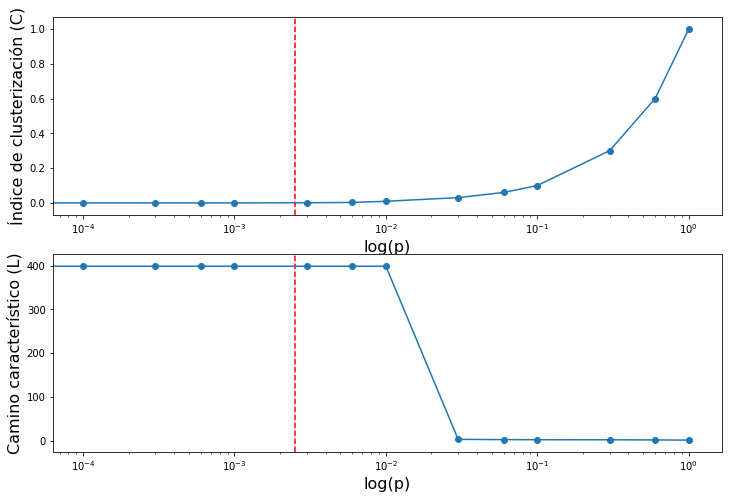

In [6]:
plt.figure(figsize = (12, 8))
plt.subplot(211)
plt.xscale("log", nonposx = 'clip')
plt.ylabel("Índice de clusterización (C)", fontsize = 16)
plt.xlabel("log(p)", fontsize = 16)
plt.axvline(x=pc, color='r', ls='--')
plt.plot(ar_p, ar_C)
plt.scatter(ar_p, ar_C)
plt.subplot(212)
plt.xscale("log", nonposx = 'clip')
plt.ylabel("Camino característico (L)", fontsize = 16)
plt.xlabel("log(p)", fontsize = 16)
plt.axvline(x=pc, color='r', ls='--')
plt.axvline(x=pc_L, color='r', ls='--')
plt.plot(ar_p, ar_L)
plt.scatter(ar_p, ar_L)
plt.show()

## ¿Para  qué  probabilidades pse  producen  cambios  fase  en  el  comportamiento  los parámetros L, C?

En ambos gráficos la probabilidad crítica $p_c$ teórica se muestra con una línea vertical de color rojo. Observaciones:

* El camino característico se mantiene en (N-1) para los primeros valores de $p$. Esto es porque todavía no obtenemos un grafo conexo y el camino característico es, por tanto, infinito. No obstante, cuando empieza a ser conexo el camino caracteŕistico cae según añadimos nuevas aristas en el grafo. 

* Tiene sentido que en ambas gráficas cambien su tendencia en ese punto, porque a medida que crece la C el camino característico entre nodos disminuye; están más conectados, y el índice de clusterización aumenta.

In [19]:
# Calcular camino característico para componente más grande
def L_C_Aleatorio(n_graph,n,p):
    mu_C = np.zeros(n_graph)
    mu_L = np.zeros(n_graph)
    for i in range(n_graph):
        G = nx.gnp_random_graph(n, p)
        C = nx.average_clustering(G)
        if nx.is_connected(G):
            L = nx.average_shortest_path_length(G)
        else:
            Gc = max(nx.connected_component_subgraphs(G), key=len)
            L = nx.average_shortest_path_length(Gc)
            
        mu_C[i] = C
        mu_L[i] = L
    media_L = np.mean(mu_L)
    media_C = np.mean(mu_C)
    des_L = np.std(mu_L)
    des_C = np.std(mu_C)

        
    return media_L, media_C, des_L, des_C

n = 400
n_graph = 20
ar_p = np.array([0,0.0001,0.0003,0.0006, 0.001,0.003,0.006,0.01,0.03,0.06,0.1, 0.3,0.6,1.])
ar_C = np.zeros(len(ar_p))
ar_L = np.zeros(len(ar_p))

for i, p in enumerate(ar_p):
    print('Probabilidad: ', p)
    ar_L[i], ar_C[i], des_L, des_C = L_C_Aleatorio(n_graph,n,p)
    print("Camino característico", ar_L[i],"con desv", des_L,
          "Índice de clusterización", ar_C[i], "con desv", des_C, end = "\n")


Probabilidad:  0.0
Camino característico 0.0 con desv 0.0 Índice de clusterización 0.0 con desv 0.0
Probabilidad:  0.0001
Camino característico 1.1083333333333332 con desv 0.16894279110594407 Índice de clusterización 0.0 con desv 0.0
Probabilidad:  0.0003
Camino característico 1.4 con desv 0.16158932858054437 Índice de clusterización 0.0 con desv 0.0
Probabilidad:  0.0006
Camino característico 1.702380952380952 con desv 0.2651252217725704 Índice de clusterización 0.0 con desv 0.0
Probabilidad:  0.001
Camino característico 2.342200577200577 con desv 0.4159535803856857 Índice de clusterización 0.0 con desv 0.0
Probabilidad:  0.003
Camino característico 9.565489149185543 con desv 1.9514589015070858 Índice de clusterización 0.0018999999999999996 con desv 0.002910779773340623
Probabilidad:  0.006
Camino característico 6.394656057796789 con desv 0.3110414016772945 Índice de clusterización 0.004106746031746032 con desv 0.0027193421671881267
Probabilidad:  0.01
Camino característico 4.45990671

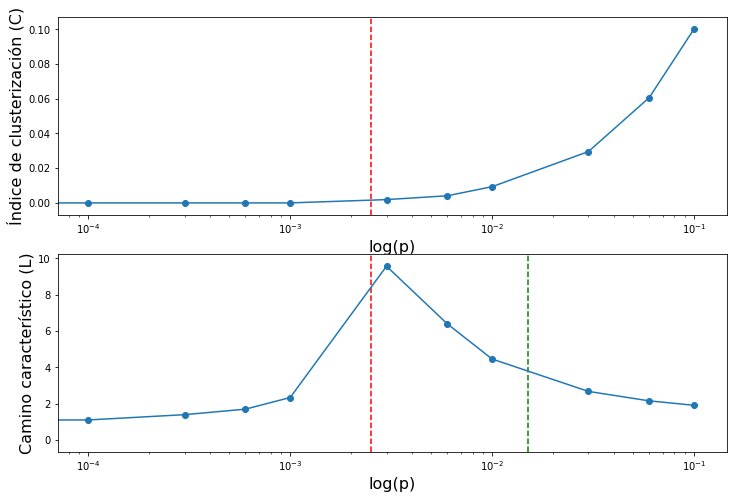

In [25]:
plt.figure(figsize = (12, 8))
plt.subplot(211)
plt.xscale("log", nonposx = 'clip')
plt.ylabel("Índice de clusterización (C)", fontsize = 16)
plt.xlabel("log(p)", fontsize = 16)
plt.axvline(x=0.0025, color='r', ls='--')
plt.plot(ar_p, ar_C)
plt.scatter(ar_p, ar_C)
plt.subplot(212)
plt.xscale("log", nonposx = 'clip')
plt.ylabel("Camino característico (L)", fontsize = 16)
plt.xlabel("log(p)", fontsize = 16)
plt.axvline(x=0.0025, color='r', ls='--')
plt.axvline(x=pc_L, color='green', ls='--')
plt.plot(ar_p, ar_L)
plt.scatter(ar_p, ar_L)
plt.show()


En el segundo gráfico, donde se muestra el comportamiento del camino mínimo $L$ calculado para la componente de mayor tamaño en función de la probabilidad de aparición de ramas $p$, observamos un comportamiento creciente al inicio, alcanzándose un máximo en 9.57,  tras el cuál comienza a decrecer tendiendo a 1 (mínimo posible). En el gráfico también se han representado con líneas discontinuas la probabilidad cŕitica en la que el comportamiento del grafo aleatorio cambia ($p_c = 1/N=$ 0.0025) (línea roja discontinua) y la probabilidad en la que el grafo aleatorio pasa a ser conexo ($p$= 0.015)(línea verde discontinua). 

Al comienzo de la gŕafica las ramas que se generan conectan un número reducido de nodos permitiéndo que el camino característico sea bajo. A medida que aumenta la probabilidad, se añaden más ramas al grafo produciendose un aumento en el número de nodos conectados alargando así la distancia entre ellos.

Entre ambas líneas se encontraría la isla gigante que se transforma en un grafo conexo a medida que aumenta el número de ramas. En esta región de transición, alcanzaríamos el máximo del camino característico debido a que la probabilidad es suficientemente alta como para que se formen ramas que conecten más nodos de la red, pero no lo suficiente como para que esos nodos estén conectados de forma que el camino entre ellos sea corto.

Tras el máximo, se produce un descenso de camino característico debido a que hay que considerar que el número de nodos es constante, por lo que habrá un punto en el que las nuevas ramas que se generen no conectarán nuevos nodos previamente desconectados, sino que se encargarán de aumentar la conexión entre nodos. Esto último se traduce en un aumento de la conectividad y una disminución del camino característico tendiendo a 1 cuando el grafo sea denso.  

# Apartado 2

Usando la función de NetworkX watts_strogatz_graph(n, k, p) implementad una
rutina Python L_C_small_world(n_graph, n,k,p) que devuelva valor promedio de los
coeficientes C (índice de clusterización promedio) y L (camino característico) para
un conjunto de n_graph grafos de tipo Small World o mundo pequeño. 

Este algoritmo permite crear redes de mundo pequeño a partir de un grafo regular de $N$ nodos donde cada nodo se encuentra unido con $2m=k$ vecinos (siendo $m$ el número de vecinos a izquierda o derecha del nodo), modificando la probabilidad ($p$) con la que un nodo se una a otro nodo cualquiera, generándose así atajos dentro del grafo. De este modo, cuando $p$=0, el grafo constituirá un anillo regular en el que todos los nodos tienen el mismo grado, mientras que si $p$=1 el grafo se comportará como un grafo aleatorio, es decir, la distribución de las aristas entre los distintos nodos será aleatoria. 

Las redes regulares se caracterizan por un coeficiente de agrupamiento $C$ muy alto (cercano a 1) y una longitud de camino mínimo promedio ($L$) también grande, sobre todo para $k$<<$N$. Siendo de hecho $L \sim N/k$.

Las redes de mundo pequeño comparten características tanto con los grafos regulares, como con los grafos aleatorios (donde $C$ y $L$ es bajo). En consecuencia, las redes de mundo pequeño se encuentran en la región de transición entre ambos extremos, presentando un valor de índice de clusterización ($C$) alto y un camino mínimo ($L$) bajo.

In [18]:
G = nx.watts_strogatz_graph(400, 8, 0)
print(nx.info(G))
L = nx.average_shortest_path_length(G)
print("Camino mínimo medio", L)
C = nx.average_clustering(G)
print("Índice de clusterización", C)

Name: 
Type: Graph
Number of nodes: 400
Number of edges: 1600
Average degree:   8.0000
Camino mínimo medio 25.43859649122807
Índice de clusterización 0.6428571428571402


A modo de comprobación, podemos calcular el valor teórico de $C$, $L$, número de ramas ($|E|$) y el número de atajos generados para un grafo regular con $p$=0, mediante las siguientes fórmulas:

$$C(p) = \frac{3(k/2-1)}{2 \times (k-1)} \times (1-p)^3 \rightarrow \space C(0) = \frac{3(8/2-1)}{2 \times (8-1)} = 0.643$$

$$L(N, 0) = \frac{N(N+k-2)}{2k(N-1)} \sim \frac{N}{2k} \rightarrow \space L (400, 0) \sim \frac{400}{2 \times 8} \sim 25$$


$$|E| = \frac{N \times k}{2} = \frac{400 \times 8}{2} = 1600$$

$$Número \space de \space atajos \space (p=0) = p \times N \times k=0$$


Donde:

* $N$ es el número de nodos
* $k$ es el grado medio de los nodos (igual al grado de cada nodo en un grafo regular)
* $|E|$ es el número de aristas
* $p$ es la probabilidad de reordenar una arista de forma aleatoria

In [7]:
def L_C_Small_World(n_graph,n,k,p):
    mu_C = 0
    mu_L = 0
    for i in range(n_graph):
        G = nx.watts_strogatz_graph(n, k, p)
        C = nx.average_clustering(G)
        if nx.is_connected(G):
            L = nx.average_shortest_path_length(G)
        else:
            L = n-1
        mu_C += C/n_graph
        mu_L += L/n_graph
        
    return mu_L, mu_C

In [8]:
n = 400
n_graph = 20
k = 8
ar_p = np.array([0,0.0001,0.0003,0.0006, 0.001,0.003,0.006,0.01,0.03,0.06,0.1,0.3,0.6,1.])

ar_C = np.zeros(len(ar_p))
ar_L = np.zeros(len(ar_p))

for i, p in enumerate(ar_p):
    print('Probabilidad: ', p)
    ar_L[i], ar_C[i] = L_C_Small_World(n_graph, n, k, p)

Probabilidad:  0.0
Probabilidad:  0.0001
Probabilidad:  0.0003
Probabilidad:  0.0006
Probabilidad:  0.001
Probabilidad:  0.003
Probabilidad:  0.006
Probabilidad:  0.01
Probabilidad:  0.03
Probabilidad:  0.06
Probabilidad:  0.1
Probabilidad:  0.3
Probabilidad:  0.6
Probabilidad:  1.0


## ¿Para qué probabilidades p se producen cambios fase en el comportamiento los parámetros L y C?

Para un grafo de mundo pequeño se comprueba que el camino característico disminuye bruscamente (cambio de régimen) para el valor teórico: 

$$p = \frac{1}{k|V|} \;.$$ 

En nuestro caso, para $k=8$ y $|V| = 400$, tendríamos que la probabilidad crítica

$$ p_c = \frac{1}{8\times 400} = 0.0003 \;.$$


La probabilidad crítica en la que se produce la transición del camino carácterístico puede calcularse de forma aproximada mediante el cálculo del punto de intersección entre las dos regiones con distinta pendientes que muestra la gráfica. De este modo, tenemos una región inicial donde la pendiente es nula ($m_1$=0), y una segunda región donde la pendiente es negativa ($m_2$ < 0). Asignando el punto $P_1$ a la primera región con las coordenadas (0, 0.64); y los puntos $P_2, P_3$ a la segunda región con coordenadas (0.3, 0.2) y (0.6, 0.03), respectivamente, se puede calcular el punto de corte de las dos regiones resolviendo el siguiente sistema:

$$a) \space y = 0.64$$
$$b) \space y = -1.76 x + 0.73$$

Resolviendo, se obtiene que:

$$x = 0.05 \rightarrow p_c = 0.05$$

In [9]:
pc = 1/(k*n)
print('Probabilidad crítica (1/(k*n)): ', pc)

Probabilidad crítica (1/(k*n)):  0.0003125


In [ ]:
pc_C = 0.05 # probabilidad critica donde ocurre el cambio de fase de C
pc_R = 0.68 # Margen derecho

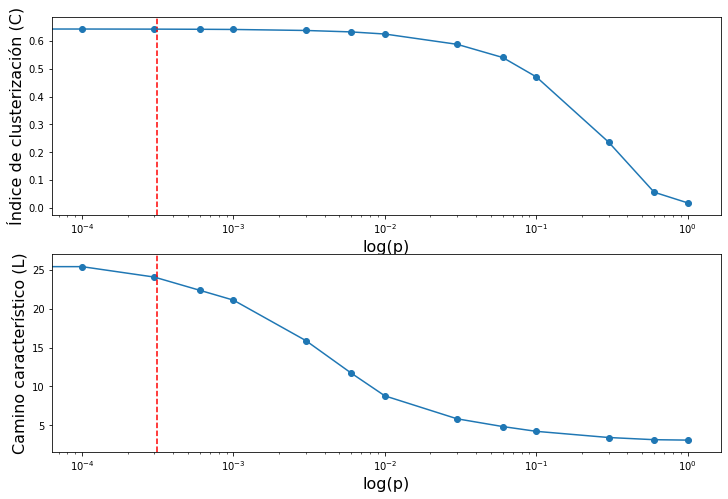

In [10]:
plt.figure(figsize = (12, 8))
plt.subplot(211)
plt.xscale("log", nonposx = 'clip')
plt.ylabel("Índice de clusterización (C)", fontsize = 16)
plt.xlabel("log(p)", fontsize = 16)
plt.axvline(x=pc, color='r', ls='--')
plt.axvline(x=pc_C, color='green', ls='--')
plt.axvline(x=pc_R, color='r', ls='--')
plt.plot(ar_p, ar_C)
plt.scatter(ar_p, ar_C)
plt.subplot(212)
plt.xscale("log", nonposx = 'clip')
plt.ylabel("Camino característico (L)", fontsize = 16)
plt.xlabel("log(p)", fontsize = 16)
plt.axvline(x=pc, color='r', ls='--')
plt.axvline(x=pc_C, color='green', ls='--')
plt.axvline(x=pc_R, color='r', ls='--')
plt.plot(ar_p, ar_L)
plt.scatter(ar_p, ar_L)
plt.show()

En ambos gráficos hemos señalado la probabilidad crítica teórica $p_c$ con una línea vertical de color rojo. Obervaciones:

* La probabilidad crítica teórica $p_c$ para el camino característico se corresponde a la obtenida con los resultados empíricos, ya que marca un cambio de tendencia en la gráfica obtenida para el camino característico $L$.

* A medida que aumenta la probabilidad de reconectar una arista observamos que el índice de clusterización disminuye. En un watts_strogatz los nodos se unen con sus k vecinos. Por lo tanto, a medida que se reconectan aristas esta propiedad se diluye y el índice de cluterización se comporta en mayor medida como un grafo aleatorio. 

## ¿Entre que valores de p dirías que está la zona de Small-World para estos valores de N y k?

En los gráficos anteriores se muestra el comportamiento del índice de clusterización ($C$) y el camino mímino característico ($L$) en función de la probabilidad de reconexión $p$ [[2](http://www.cs.us.es/~fsancho/?e=80)]. 

Vemos que la función del camino característico dependiente de $p$ decrece a valores bajos de $p$, mientras que el índice de clusterización decrece con valores más altos de $p$
El efecto de la reconexión sobre el camino característico ($L$) es altamente no-lineal pues puede disminuir considerablemente con muy pocos atajos ("shortcuts"). Sin embargo, la reconexión de unas pocas aristas en un grupo de nodos muy agrupados solo tiene un efecto lineal sobre ese grado de agrupamiento. Por esto puede haber una región de valores de $p$ para la que el índice de clustericación ($C$) apenas se ve afectado mientras que $L$ pasa rápidamente de valores altos a pequeños [[3](https://www.ugr.es/~jtorres/Tema_2_redes_complejas.pdf)]. 

Las redes de mundo pequeño se encontrarían en torno a la región delimitada por las probabilidades críticas de los parámetros $L$ y $C$. No obstante, el margen derecho de la región, delimitado por la $p_c$ de $C$, puede extenderse algo más dado que la caída del índice de clusterización no es tan abrupto como el del camino característico. La extensión puede calcularse conociendo qué índice de clusterización tendría un grafo aleatorio con el mismo número de nodos ($N$ = 400) y mismo número de ramas ($N \times k/2$=1600); y calculando posteriormente la probabilidad $p$ del modelo watts_strogatz_graph asociado a ese índice de clusterización. A continuación se muestra el grafo aleatorio con el mismo número de nodos y ramas que el grafo regular, y el valor del índice de clusterización para 20 simulaciones: 

In [31]:
ar_C = np.zeros(20)
ar_L = np.zeros(20)
n = 400
m = 1600
for i in range(20):
    AL= nx.gnm_random_graph(n, m)
    C = nx.average_clustering(AL)
    if nx.is_connected(AL):
        L = nx.average_shortest_path_length(AL)
    else:
        L = -1
        
    ar_C[i] = C
    ar_L[i] = L
    
print(nx.info(AL))    
print("Camino mínimo medio", round(np.mean(ar_L), 3), "con desviación estándar de ", round(np.std(ar_L), 3))
print("Índice de clusterización",round(np.mean(ar_C), 3), "con desviación estándar de ", round(np.std(ar_C), 3))

Name: 
Type: Graph
Number of nodes: 400
Number of edges: 1600
Average degree:   8.0000
Camino mínimo medio 2.903 con desviación estándar de  0.895
Índice de clusterización 0.019 con desviación estándar de  0.003


Para una $C$ = 0.019, la probabilidad de reordenamiento de aristas del grafo regular $p$, sería $p$ = 0.68. Por lo que la región de mundo pequeño se exntendería desde la probabilidad cricia del camino mínimo ($p_c$ = 0.0003) hasta la probabilidad donde se obtiene un índice de clusterización igual al de un grafo aleatorio con el mismo número de ramas y nodos ($p$ = 0.68). 

## ¿Corresponde el valor de p observado con el valor de p teórico para el cambio de fase en el comportamiento del camino característico?

Analizando la gráfica que muestra como el camino mímino característico (𝐿) cambia en función de la probabilidad de reconexión $p$, podemos observar que el valor $p_c$ = 0.0003 teórico, coincide con la transición de $L$ desde valores altos a bajos. 

## Comparar las gráficas obtenidas de C y L con las correspondientes gráficas teóricas

A continuación se muestra la gráfica del comportamiento teórico de $L$ y $C$ en función de la probabilidad de reconexión $p$: 
![alt text](grafica_teorica.png "Title")

Cabe mencionar que ambas gráficas son comparables, dado que los voloes de $C$ y $L$ han sido normalizados, siendo divididos por el valor de estos parámetros cuando $p$ = 0. 

Comprobamos que se produce el mismo cambio que hemos observado en nuestras gráficas obtenidas, siendo el parámetro $L$ quien cambia de fase en primer lugar, y $C$ posteriormente. Igualmente, se observa en la gŕafica teórica que la $p_c$ de $L$ se sitúa en torno a 0.003 y 0.005, obteniéndose el mismo resultado que el calculado anteriormente. Lo mismo ocurre para el índice de clusterización $C$, que comienza a decrecer en torno al valor $p_c$ = 0.05. De este modo, la región de mundo pequeño podría extenderse en el margen derecho como en el caso anterior estudiado. 

## Con  los  datos  que  obtuviste  en  la  práctica  1.  ¿Dirías  que  la  red  de  interacción  de proteínas del Caernobidis Elegans puede ser considerada una red de mundo pequeño (Razona la respuesta)?

En la práctica anterior se estudió el índice de clusterización y el camino característico para el grafo de CaernoElegans, obteniéndose estos resultados: 


|                                   	| CaernoElegans 	| Aleatorio            	|
|-----------------------------------	|---------------	|----------------------	|
| $L$                                 	| 7.922564      	| 7.967503 ± 0.102507  	|
| $C$                                 	| 0.075708      	| 0.000939 ± 0.0011093 	|
| Degree_Centrality                 	| 0.001714      	| 0.001714 ± 1.362e-18 	|
| Closeness_Centrality              	| 0.071142      	| 0.097581 ± 0.00165   	|
| Betweness_Centrality              	| 0.002567      	| 0.003852 ± 0.000130  	|
| Max $k$-core 	| 6             	| 2 ± 0.0              	|
| Dispersión/Densidad               	| 0.00171       	| ---                  	|


En primer lugar, observamos que la red de proteínas de CaernoElegans no es una red aleatoria, y que presenta un camino característico $L$ igual que el grafo aleatorio, y un índice de clusterización $C$ superior en un orden de magnitud al del grafo aleatorio. En concordancia con lo que se ha establecido anteriormente en este apartado, podemos concluir que la red de proteínas de Caernobidis Elegans es una red de mundo pequeño y libre de escala (esto último se comprobó en la práctica anterior). 

# Apartado 3

Generar una red libre de escala con 10000 nodos y que añade 10 nodos en cada paso (utilizad la rutina barabasi_albert_graph(n, m)). Calculad los valores de L, C y la distribución de grado de los nodos. Generad una red aleatoria que tenga el mismo número de nodos y ramas que la red que habéis creado, calculad sus valores de L, C y la distribución del grado de los nodos y comparad los valores obtenidos.

In [3]:
#Creamos la red libre de escala
n = 10000
m = 10
G_BA = nx.barabasi_albert_graph(n, m)
nx.write_edgelist(G_BA, 'barabasi_albert.txt')
nx.write_gexf(G_BA, 'barabasi_albert.gexf')

print(nx.info(G_BA))

Name: 
Type: Graph
Number of nodes: 10000
Number of edges: 99900
Average degree:  19.9800


In [12]:
#L y C
C = nx.average_clustering(G_BA)
L = nx.average_shortest_path_length(G_BA)

print("Camino caracteristico red libre de escala: ", L)
print("Indice clusterizacion red libre de escala: ", C)

Camino caracteristico red libre de escala:  3.058794899489949
Indice clusterizacion red libre de escala:  0.011129621571113543


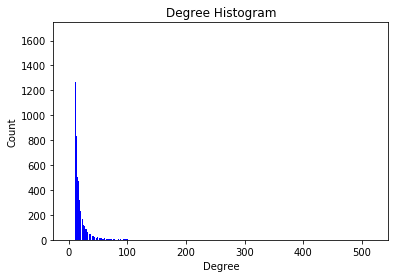

Grado medio red libre de escala:  19.98


In [13]:
dh=nx.degree_histogram(G_BA)
plt.figure(figsize = (12, 8))
plt.bar(range(len(dh)),dh, width=0.80, color='b')
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()
print('Grado medio red libre de escala: ',np.mean(list(dict(nx.degree(G_BA)).values())))

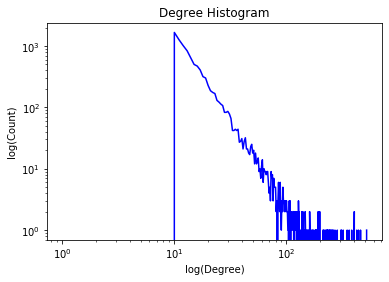

In [14]:
plt.figure(figsize = (12, 8))
plt.plot(range(len(dh)),dh, color='b')
plt.title("Degree Histogram")
plt.ylabel("log(Count)")
plt.xlabel("log(Degree)")
plt.xscale("log", nonposx = 'clip')
plt.yscale("log", nonposy = 'clip')
plt.show()

El modelo de Barabási y Albert es un modelo empleado para generar redes libres de escala mediante la adición preferencial de nodos.  La distribución de grado de las redes libres de escala no se corresponde a una distribución de Poisson característica de redes aleatorias  donde la forma de la distribución cae de manera exponencial a medida que nos alejamos del valor máximo, <$k$> [[2](http://www.cs.us.es/~fsancho/?e=80)]. Tampoco se asemeja a la distribución de los grafos regulares que presentan un Delta en el valor $k$, que es igual para todos los nodos. Las redes libres de escala se denominan así porque su distribución cae de forma más gradual que una exponencial siguiendo una ley de potencias, lo que permite la existencia de algunos nodos de grado muy alto y que no se concentren alrededor de una media (escala) [[2](http://www.cs.us.es/~fsancho/?e=80)]. 

Todo lo comentado anteriormente puede comprobarse en las gráficas anteriores. En la primera gráfica donde se representa la frecuencia de nodos en función del grado, observamos como algunos nodos están altamente conectados, aunque el grado de conexión de casi todos los nodos es bastante bajo. Igualmente, en la segunda gráfica se observa que la ley de potencias se comporta de forma lineal en escala logarítmica, apreciendo una cola en el extremo derecho de la gŕafica correspondiente a la desaparición de nodos durante la creación de la red libre de escala de Barabasi y Albert.

##### Comparación con grafos aleatorios.

Primero realizamos una comparación con un único grafo aleatorio generado con la función gnm_random_graph, donde estudiaremos $L$, $C$ y la distribución de grados. 

Después utilizamos la función del apartado 1 de esta práctica, para comparar con valores más robustos en grafos aleatorios de $L$ y $C$.

In [4]:
# Vemos el numero de ramas que tiene el grafo barabasi 
# En la info hemos visto que son 99900
e_al = 99900 #from info
G_AL = nx.gnm_random_graph(n, e_al) 
nx.write_edgelist(G_AL, 'aleatorio.txt')
nx.write_gexf(G_AL, 'aleatorio.gexf')
print(nx.info(G_AL))

Name: 
Type: Graph
Number of nodes: 10000
Number of edges: 99900
Average degree:  19.9800


In [17]:
C = nx.average_clustering(G_AL)
L = nx.average_shortest_path_length(G_AL)

print("Camino caracteristico red aleatoria: ", L)
print("Indice clusterizacion red aleatoria: ", C)

Camino caracteristico red aleatoria:  3.4037628362836285
Indice clusterizacion red aleatoria:  0.0020419920702913407


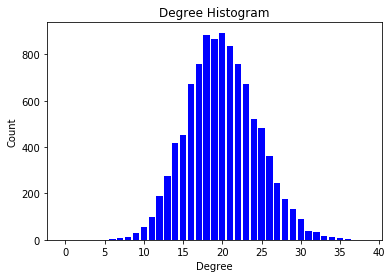

Grado medio del grafo aleatorio:  19.98


In [18]:
dh=nx.degree_histogram(G_AL)
plt.figure(figsize = (12, 8))
plt.bar(range(len(dh)),dh, width=0.80, color='b')
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()
print('Grado medio del grafo aleatorio: ', np.mean(list(dict(nx.degree(G_AL)).values())))

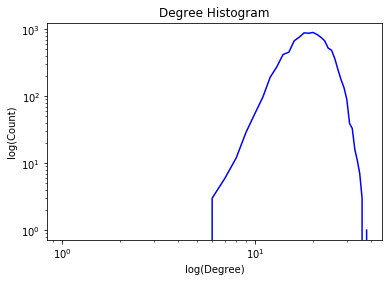

In [19]:
plt.figure(figsize = (12, 8))
plt.plot(range(len(dh)),dh, color='b')
plt.title("Degree Histogram")
plt.ylabel("log(Count)")
plt.xlabel("log(Degree)")
plt.xscale("log", nonposx = 'clip')
plt.yscale("log", nonposy = 'clip')
plt.show()

Comparando la distribución de grado de redes libre de escala con redes aleatorias, comprobamos que la ley de potencia propia de las redes libres de escala implica que todos los grados entre $k_{min}$ y $k_{max}$ pueden aparecer en la red, a diferencia de las redes homogéneas, como las redes aleatoias de Ërdos y Renyi, donde casi todos los nodos tienen el mismo grado y la probabilidad de que aparezca un nodo con un grado muy diferente de la media decae rápidamente a cero [[1](https://www.ugr.es/~jtorres/Tema_2_redes_complejas.pdf)]. Igualmente, la representación de la distribución de grado en escala logarítmica de las redes aleatorias muestra un claro comportamiento no-lineal. 

Para comparar los parámetros de índice de clusterización $C$ y camino característica $L$ de la red libre de escala con una red aleatoria es interesante usar la función del **apartado 1**. Para ello necesitamos calcular la probabilidad $p$ de generar una arista entre dos nodos en un grafo aleatorio. Sabemos que nuestra red libre de escala tiene:
* Número de nodos |V| = 10000
* Número de aristas |E| = 99900 (ver info de G_BA)

Con la ecuación:

$$|E| = p\frac{|V|(|V|-1)}{2}$$ 

Podemos despejar $p$, obteniendo:

$$p = \frac{2|E|}{|V|(|V|-1)} = 0.01998$$

Pudiendo generarse así un grafo aleatorio equivalente con el mismo número de nodos y ramas que el grafo libre de escala:

In [20]:
#Con la funcion del apartado 1
n_graph = 3
p = (2*e_al) / (n*(n-1))
print("Probabilidad p aleatoria: ", p)

mu_L, mu_C = L_C_Aleatorio(n_graph,n,p)

print("Camino caracteristico en %d redes aleatorias: "%n_graph, mu_L)
print("Indice clusterizacion en %d redes aleatorias: "%n_graph, mu_C)

Probabilidad p aleatoria:  0.001998199819981998
Camino caracteristico en 3 redes aleatorias:  3.406996086275295
Indice clusterizacion en 3 redes aleatorias:  0.0019924901216243113


Como indica la teoría, tanto el camino característico como el índice de clusterización es muy similar entre grafos aleatorios y redes libre de escala. Observando los valores obtenidos para $3$ redes aleatorias con el mismo número de nodos y aristas que nuestra red libre de escala, simplemente observamos que el camino característico es ligeramente menor en la red libre de escala ($3.40$ < $3.46$). Lo mismo ocurre para el índice de clusterización, que es ligeramente superior en la red libre de escala ($0.00204$ vs $0.00199$). La gran diferencia está en la distribución de grados, como se comento anteriormente:

* La red aleatoria tiene una distribución de grados que sigue una Poisson, como podemos observar claramente en el histograma generado para este tipo de grafos.
* Sin embargo, en una red libre de escala la distribución de grados sigue una ley de potencias. Por eso, al pintarlo en escala logarítmica, aparece una recta. 